In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Behind the scenes, seaborn uses matplotlib to draw its plots.**

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


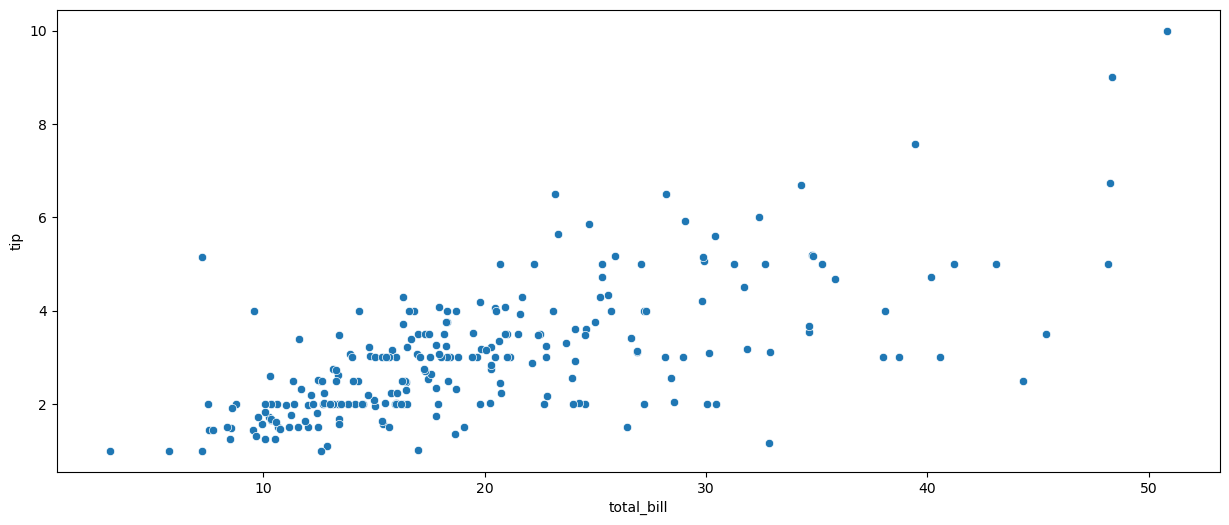

In [6]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x="total_bill", y="tip", data=tips);
#plt.xlabel(None)
#plt.ylabel(None);

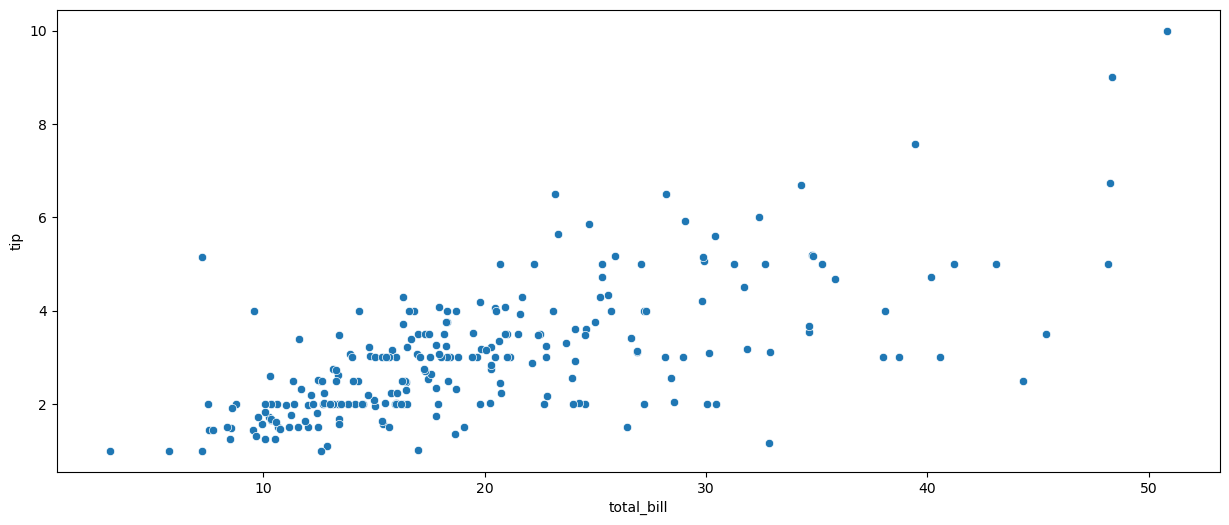

In [7]:
plt.rcParams['figure.figsize']=(15, 6)
sns.scatterplot(x=tips["total_bill"], y=tips["tip"]);

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


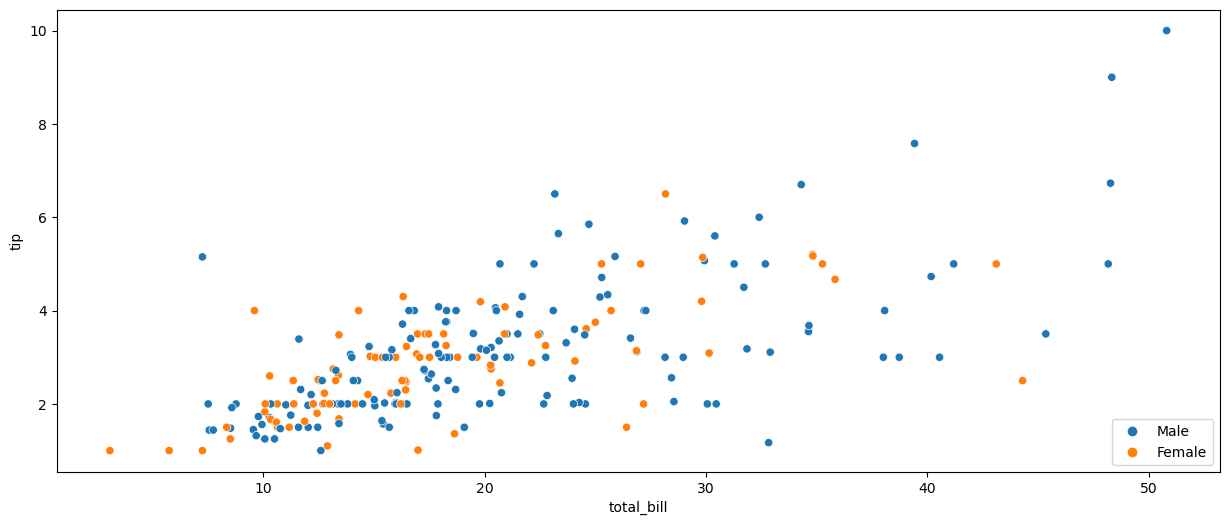

In [9]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex")
plt.legend(loc="lower right");

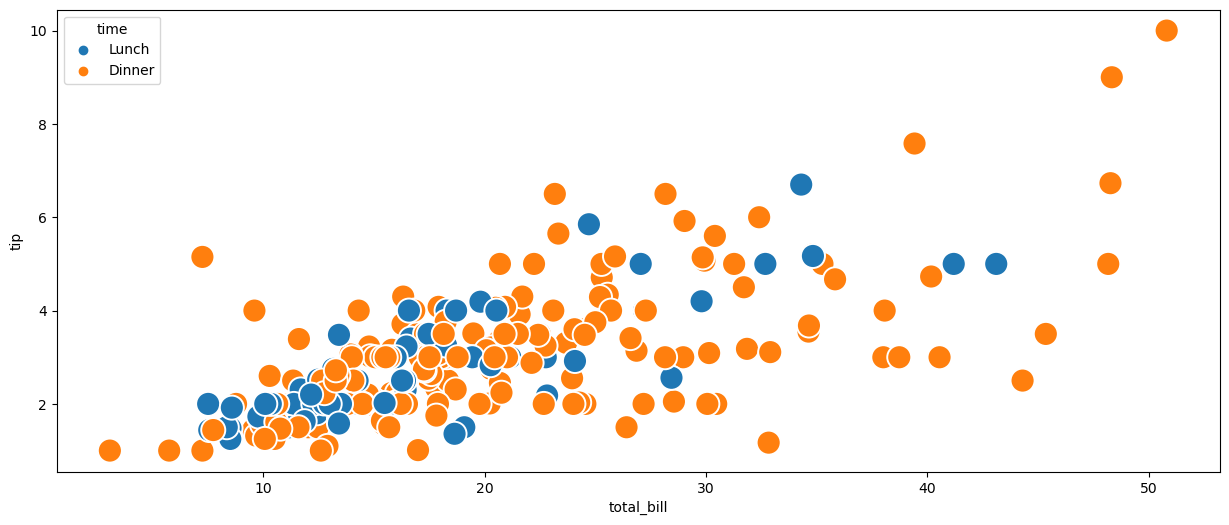

In [12]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="time", s=300);

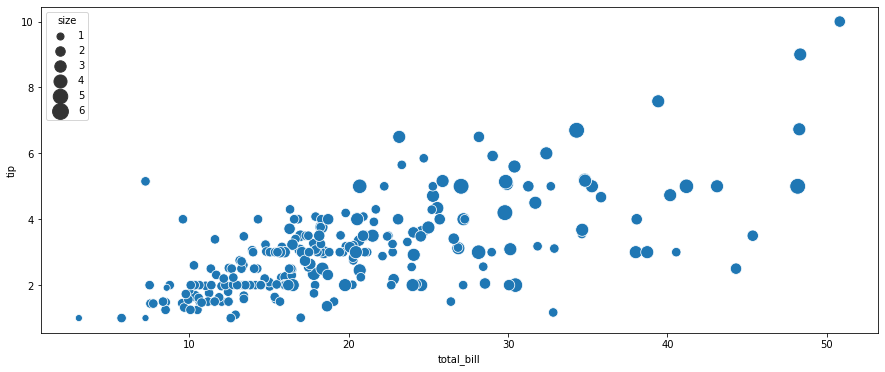

In [30]:
sns.scatterplot(x="total_bill", y="tip", data=tips, size="size", sizes=(50,250));

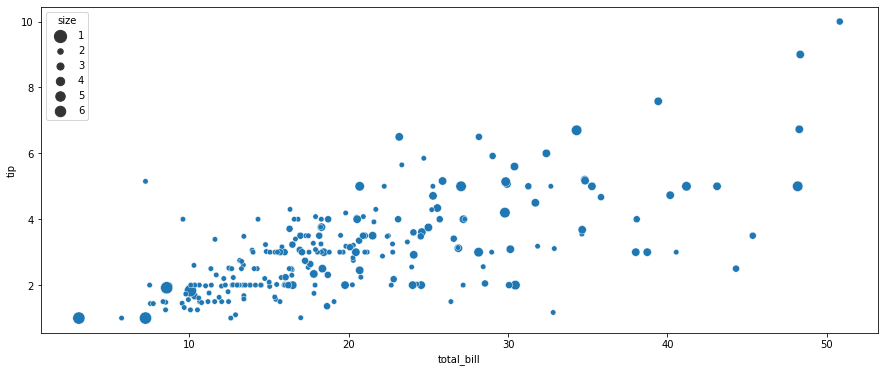

In [32]:
sns.scatterplot(x="total_bill", y="tip", data=tips, size="size", sizes=[150,30,50,70,90,110]);

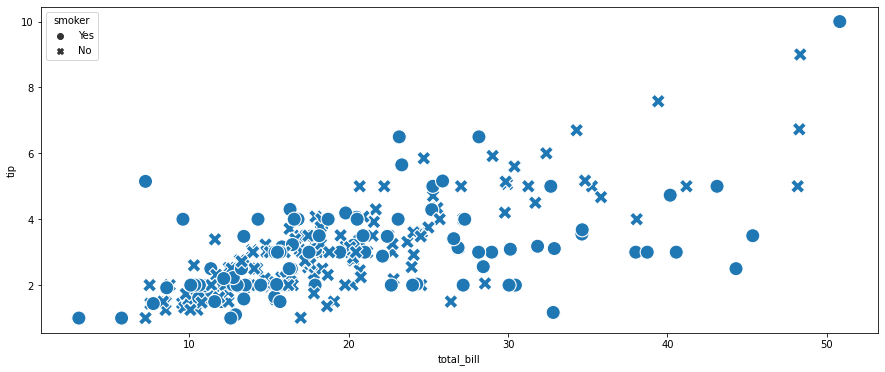

In [34]:
sns.scatterplot(x="total_bill", y="tip", data=tips, style="smoker", s=200);

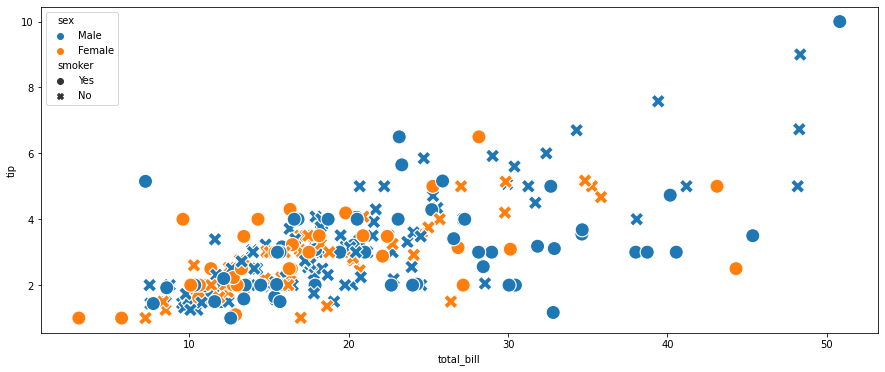

In [35]:
sns.scatterplot(x="total_bill", y="tip", data=tips, style="smoker", s=200, hue="sex");

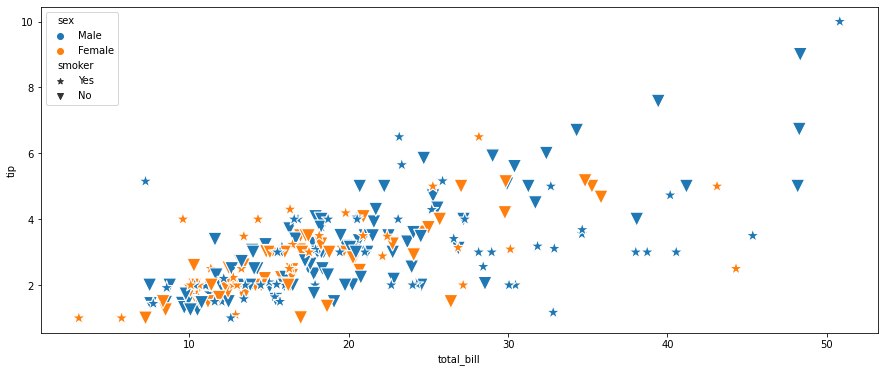

In [37]:
sns.scatterplot(x="total_bill", y="tip", data=tips, style="smoker", s=200, hue="sex", markers=["*","v"]);

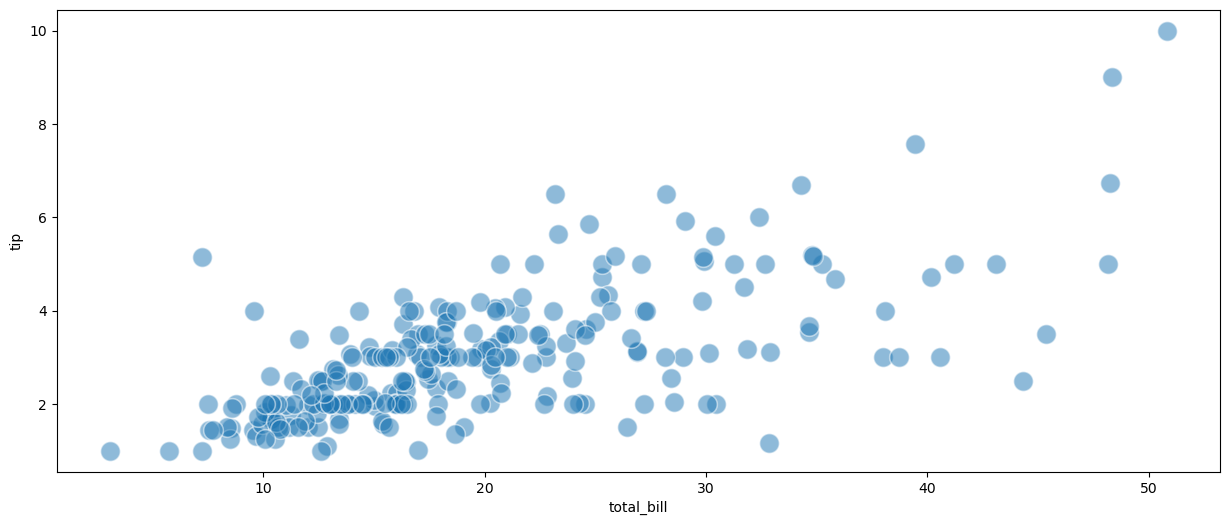

In [15]:
sns.scatterplot(x="total_bill", y="tip", data=tips, s=200, alpha=0.5);

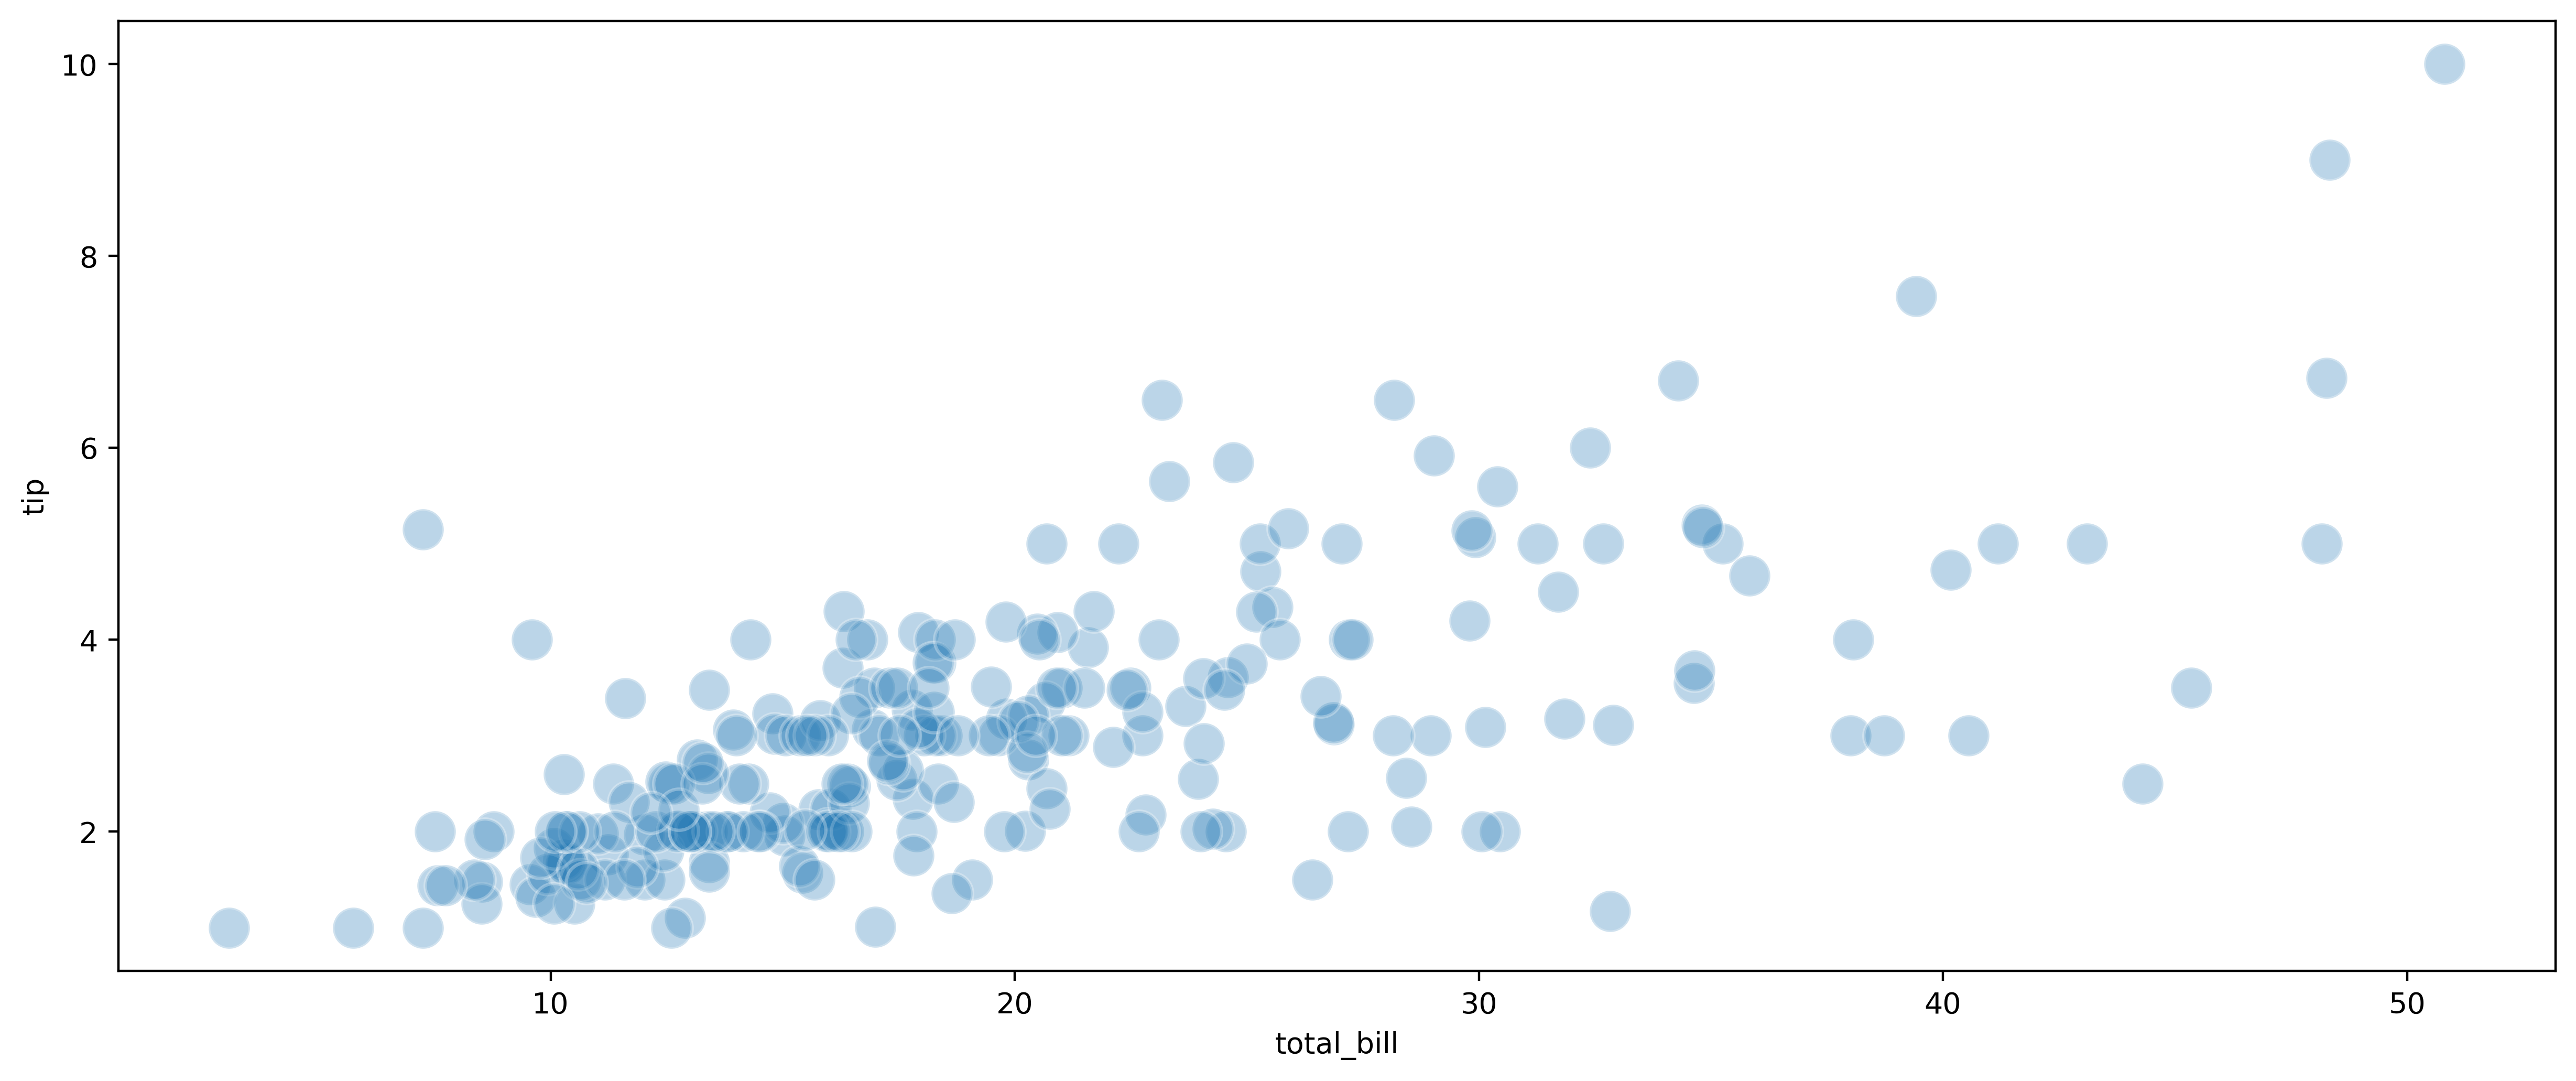

In [42]:
plt.figure(dpi=400)
sns.scatterplot(x="total_bill", y="tip", data=tips, s=200, alpha=0.3)
plt.savefig("image.jpeg");

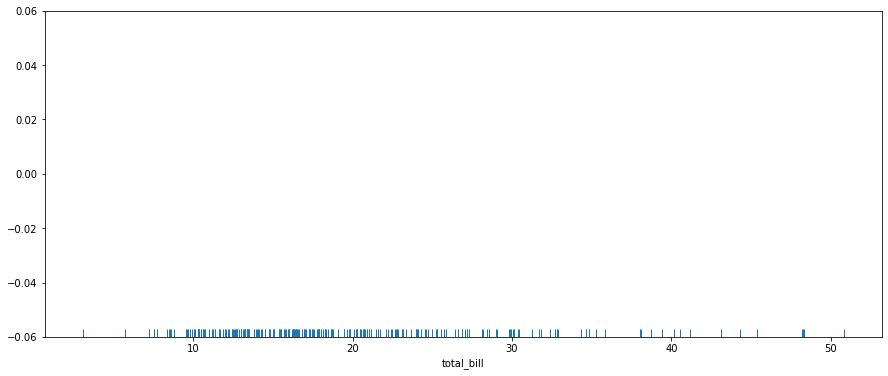

In [45]:
sns.rugplot(x="total_bill", data=tips);

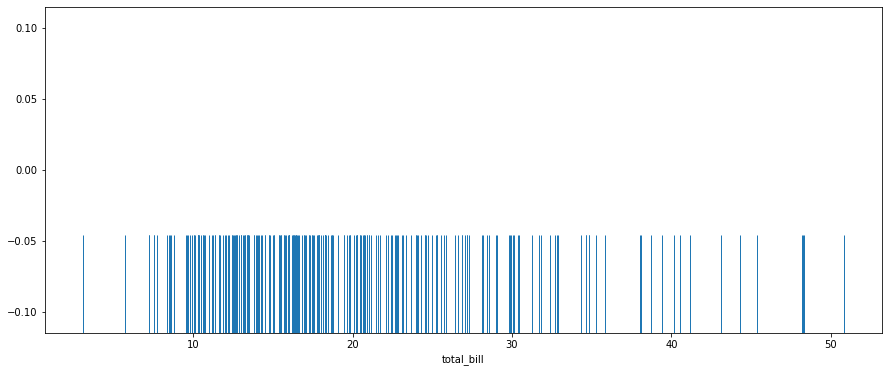

In [47]:
sns.rugplot(x="total_bill", data=tips, height=0.3);

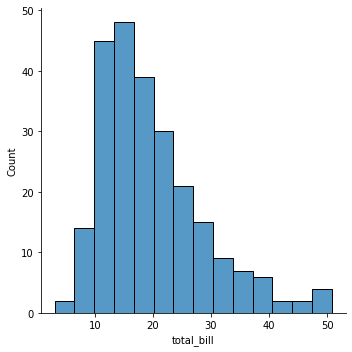

In [50]:
sns.displot(x="total_bill", data=tips);

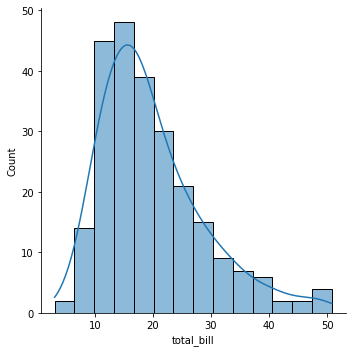

In [52]:
sns.displot(x="total_bill", data=tips, kde=True);

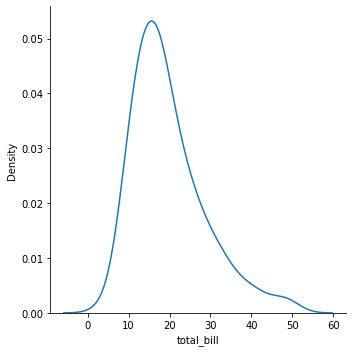

In [53]:
sns.displot(x="total_bill", data=tips, kind="kde");

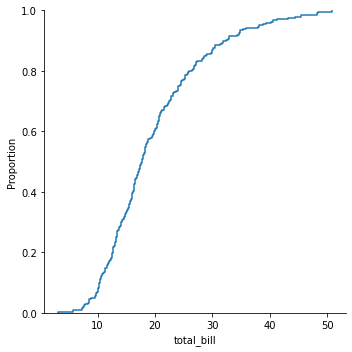

In [54]:
sns.displot(x="total_bill", data=tips, kind="ecdf");

In [57]:
len(tips[tips["total_bill"]<10]) / len(tips)

0.06967213114754098

In [75]:
#len((tips[tips["total_bill"]<20]) & (tips[tips["total_bill"] >10])) / len(tips)
len(tips[(tips["total_bill"]<20) & (tips["total_bill"] >10)]) / len(tips)

0.5327868852459017

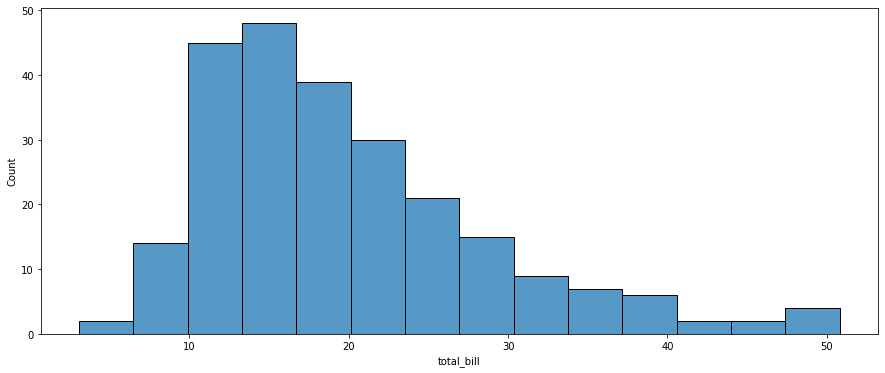

In [59]:
sns.histplot(x="total_bill", data=tips);

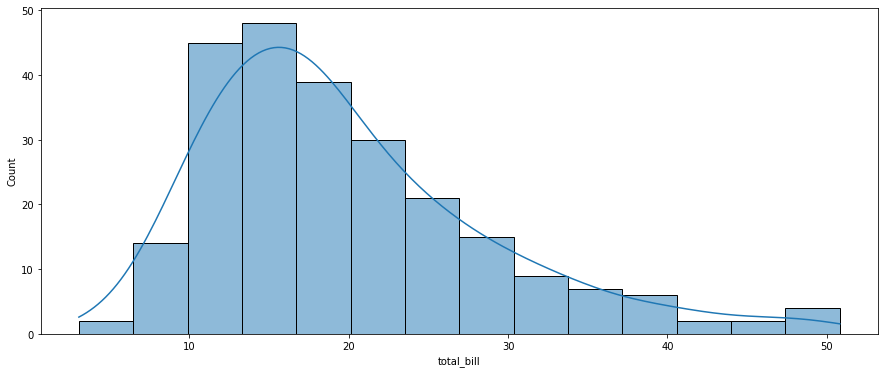

In [61]:
sns.histplot(x="total_bill", data=tips, kde=True);

<Axes: xlabel='total_bill', ylabel='Count'>

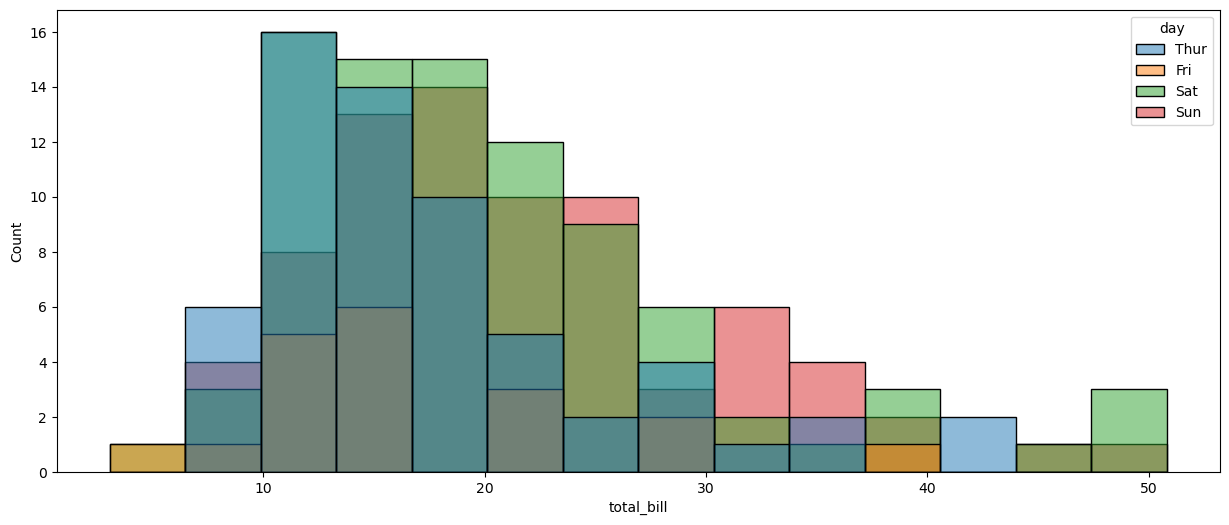

In [18]:
sns.histplot(x="total_bill", data=tips, hue="day")


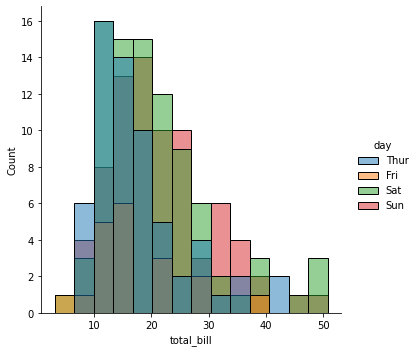

In [82]:
sns.displot(x="total_bill", data=tips, hue="day")

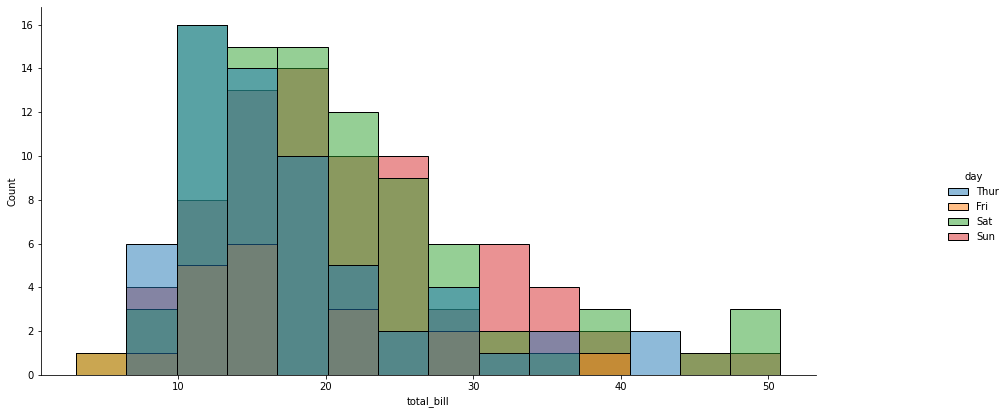

In [85]:
g = sns.displot(x="total_bill", data=tips, hue="day")
g.fig.set_size_inches(15, 6);

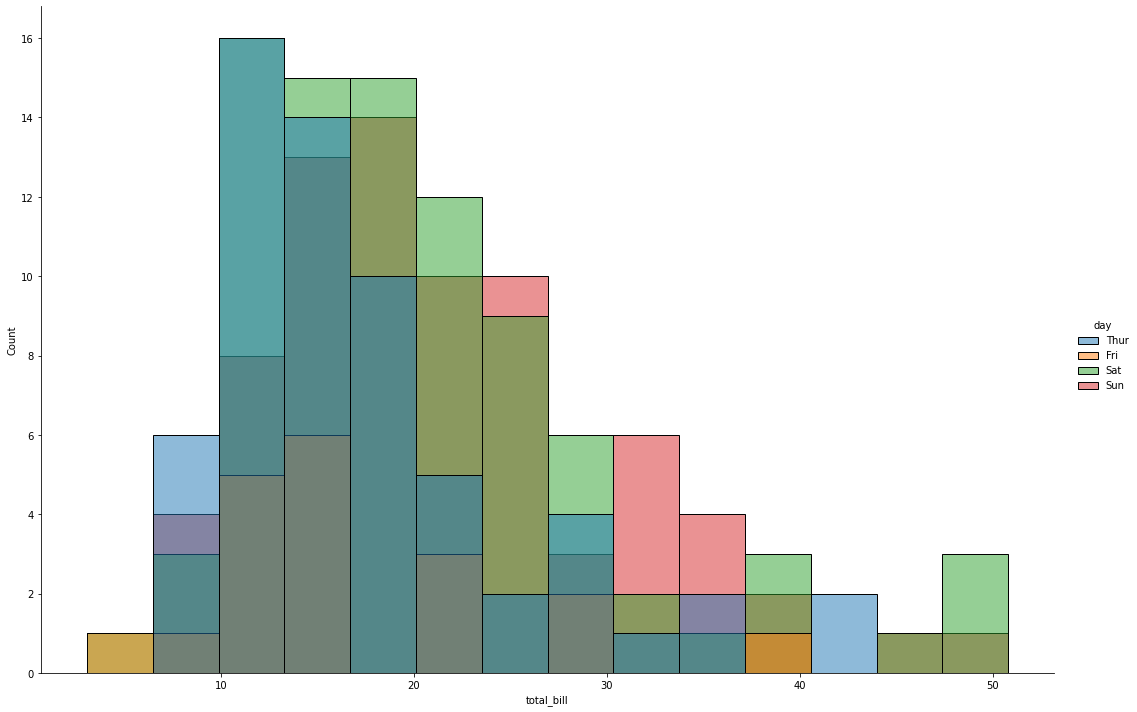

In [89]:
sns.displot(x="total_bill", data=tips, hue="day",height=10, aspect=1.5);

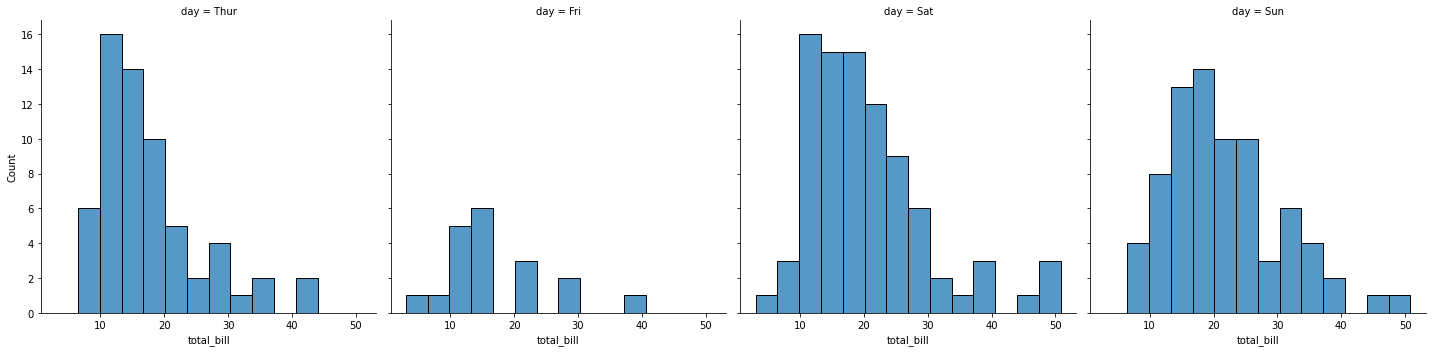

In [78]:
sns.displot(x="total_bill", data=tips, col="day")

In [79]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


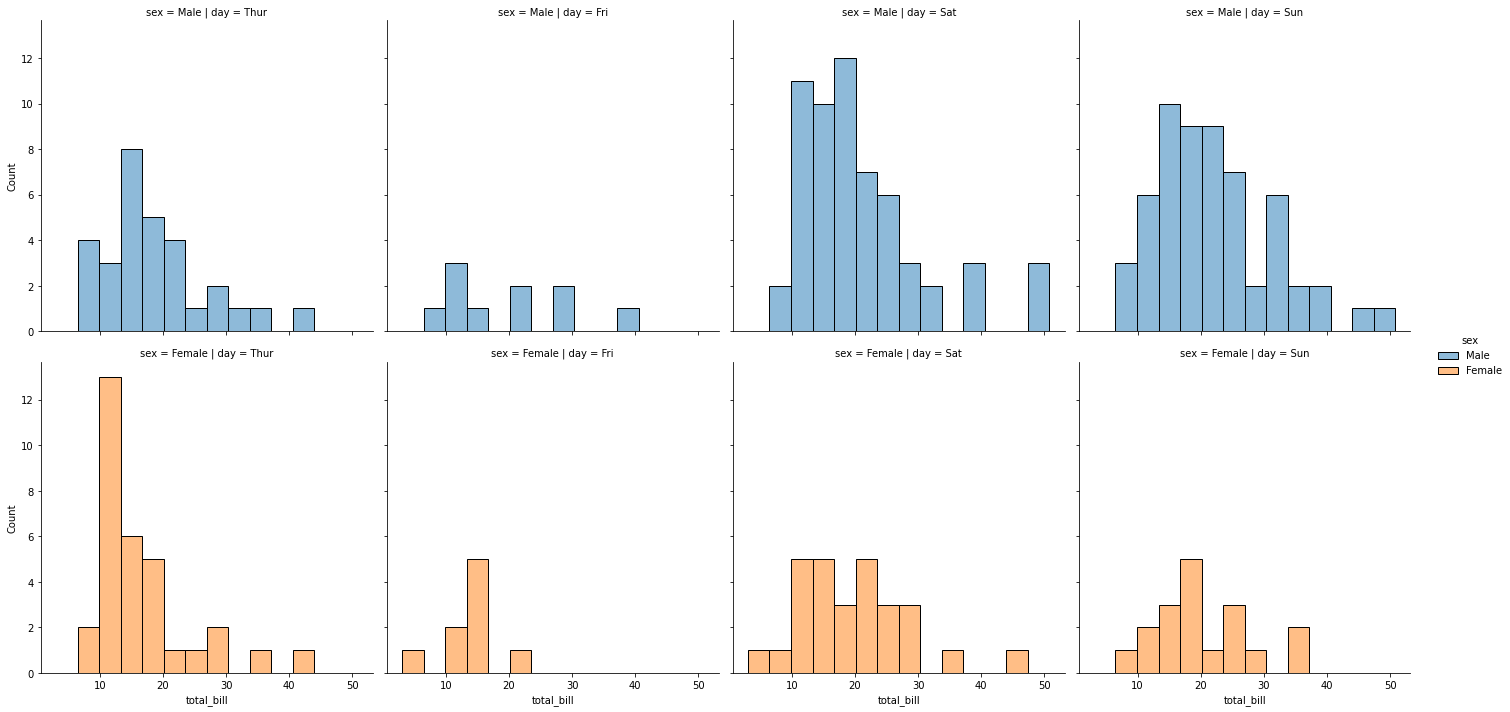

In [81]:
sns.displot(x="total_bill", data=tips, col="day", row="sex", hue="sex")

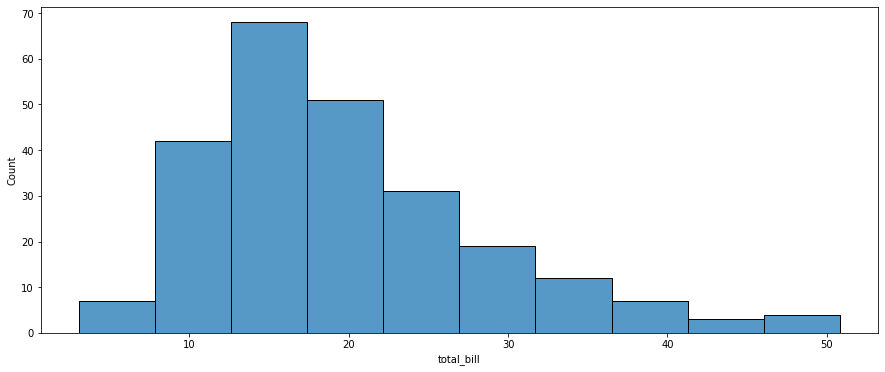

In [91]:
sns.histplot(x="total_bill", data=tips, bins=10);

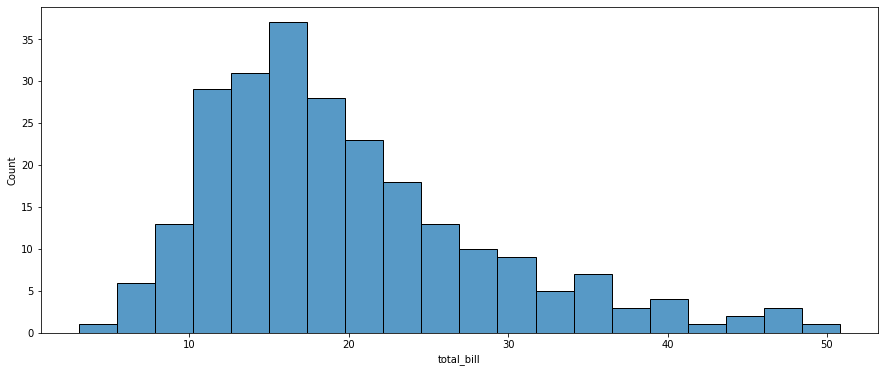

In [92]:
sns.histplot(x="total_bill", data=tips, bins=20);

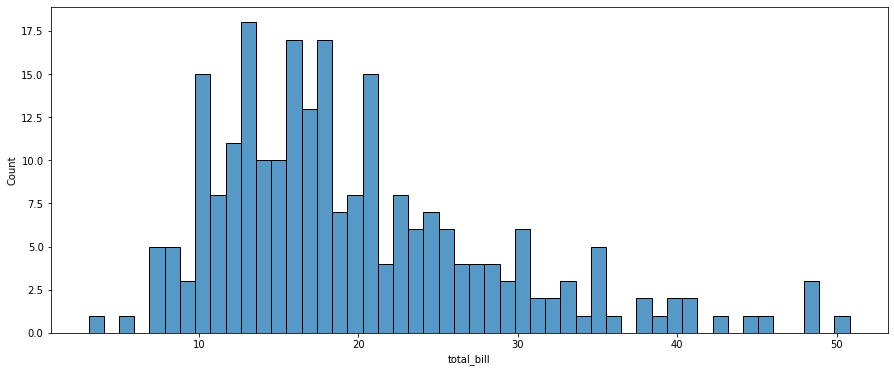

In [93]:
sns.histplot(x="total_bill", data=tips, bins=50);

In [94]:
def freedman_diaconis(data, returnas="bins"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75))
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return result

In [96]:
freedman_diaconis(tips["total_bill"])

14

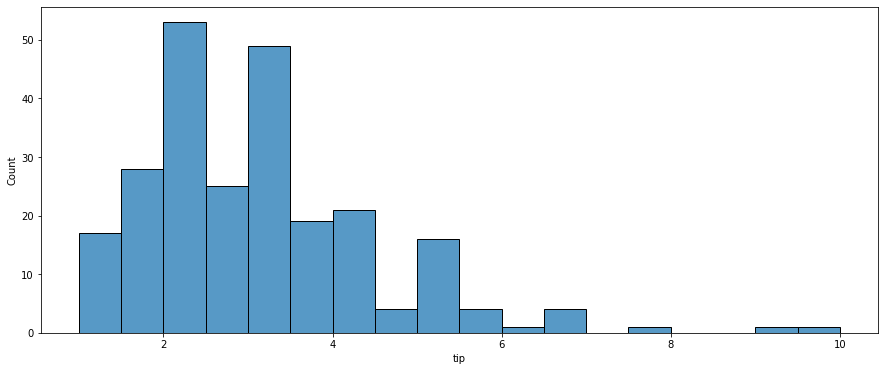

In [97]:
sns.histplot(x="tip", data=tips);

In [98]:
freedman_diaconis(tips["tip"])

18

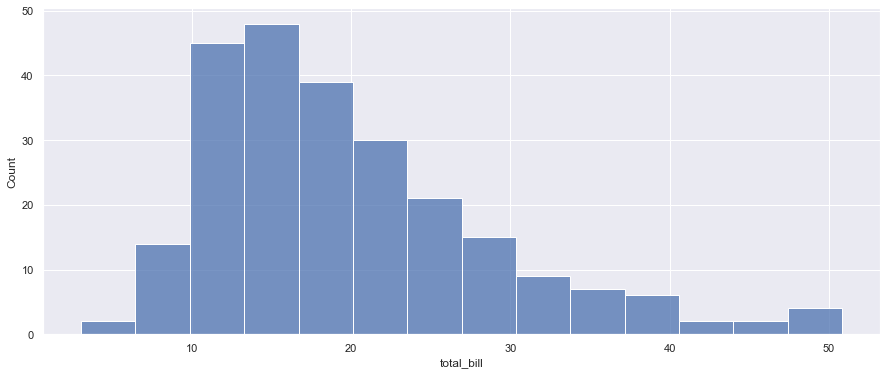

In [99]:
sns.set_theme(style="darkgrid")
sns.histplot(data=tips, x="total_bill");

In [100]:
sns.reset_defaults() 

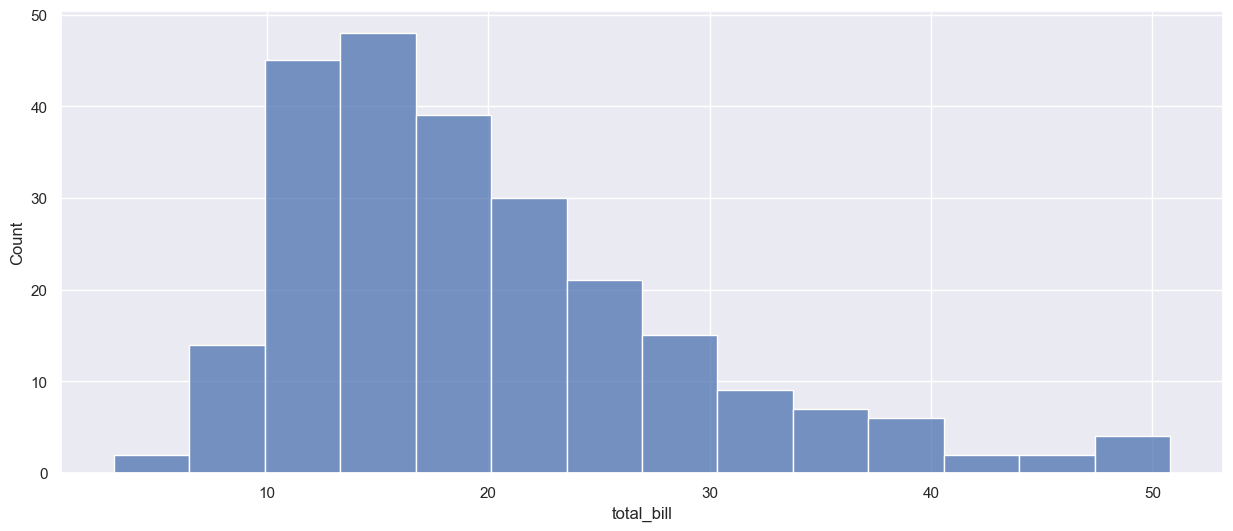

In [103]:
sns.set_theme(style="darkgrid", rc={'figure.figsize':(15, 6)})
sns.histplot(data=tips, x="total_bill");


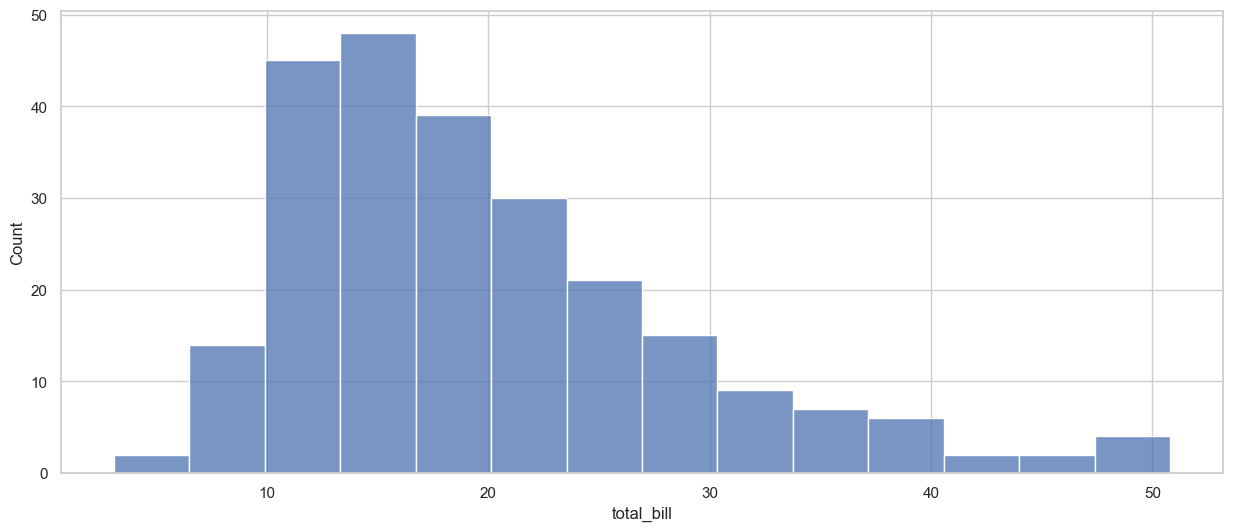

In [104]:
sns.set_theme(style="whitegrid")
sns.histplot(data=tips, x="total_bill");

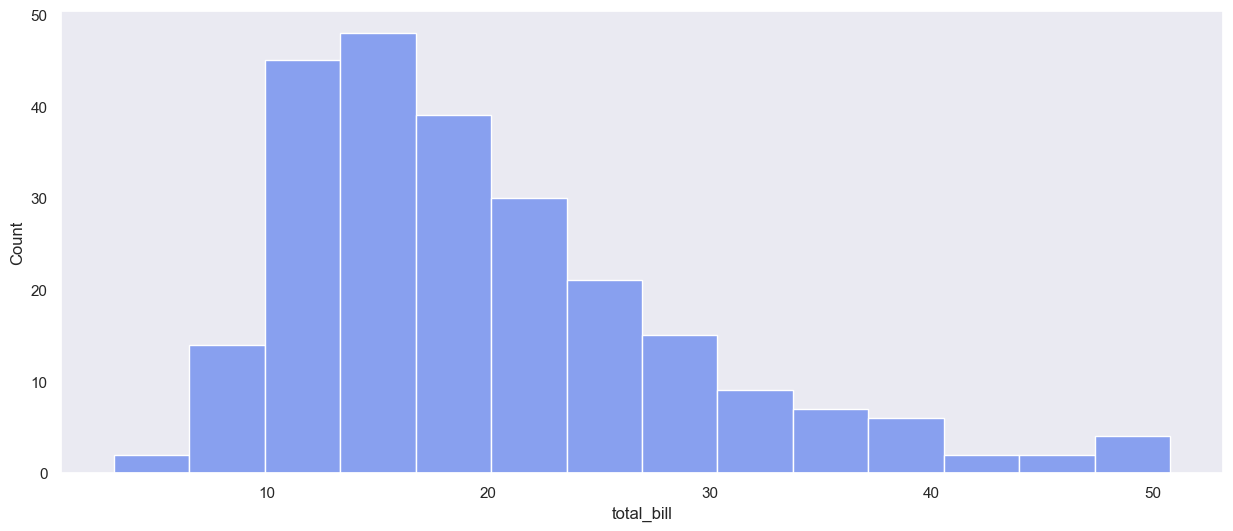

In [106]:
sns.set_theme(style="dark", palette="coolwarm")
sns.histplot(data=tips, x="total_bill");

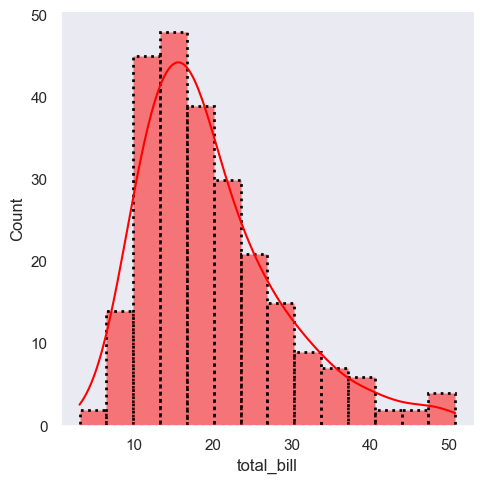

In [116]:
sns.displot(data=tips, x="total_bill", kde=True,
           color="red", edgecolor="black", lw=3, ls=":");

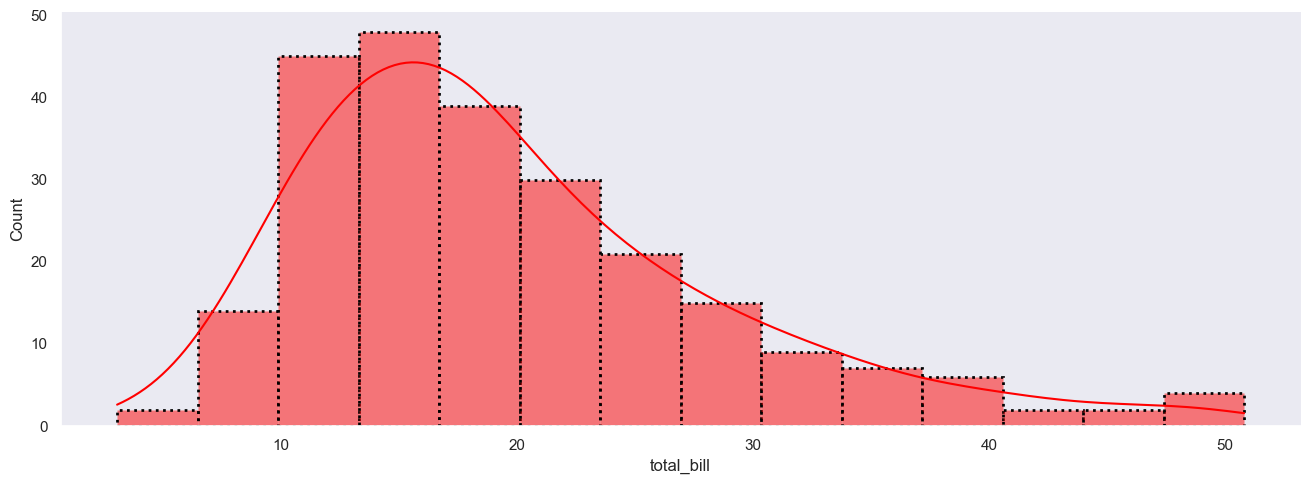

In [117]:
g = sns.displot(data=tips, x="total_bill", kde=True,
           color="red", edgecolor="black", lw=3, ls=":")
g.fig.set_size_inches(15,5);

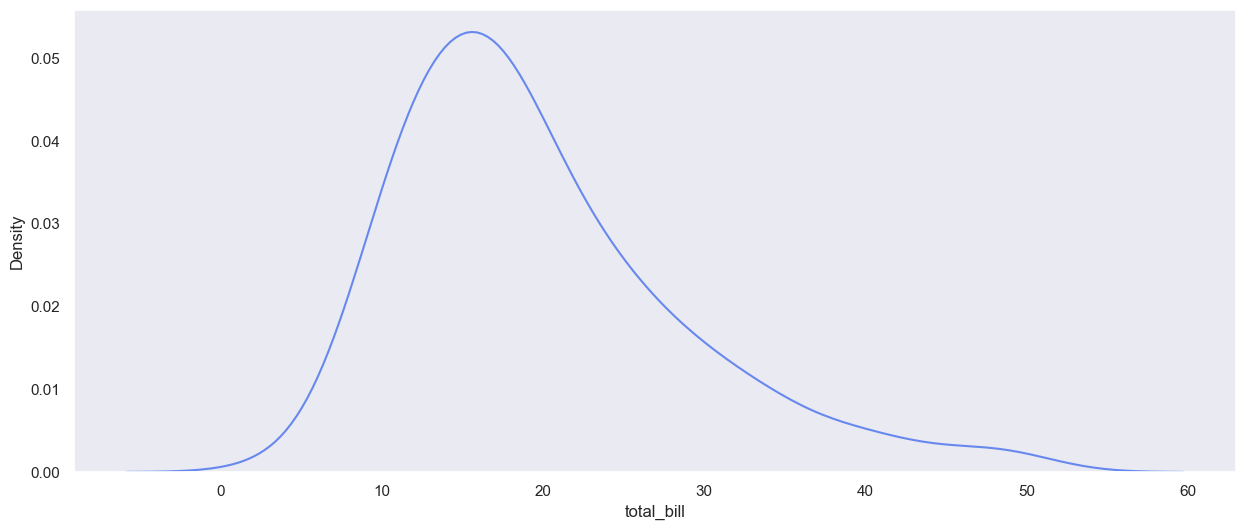

In [118]:
sns.kdeplot(x="total_bill", data = tips);

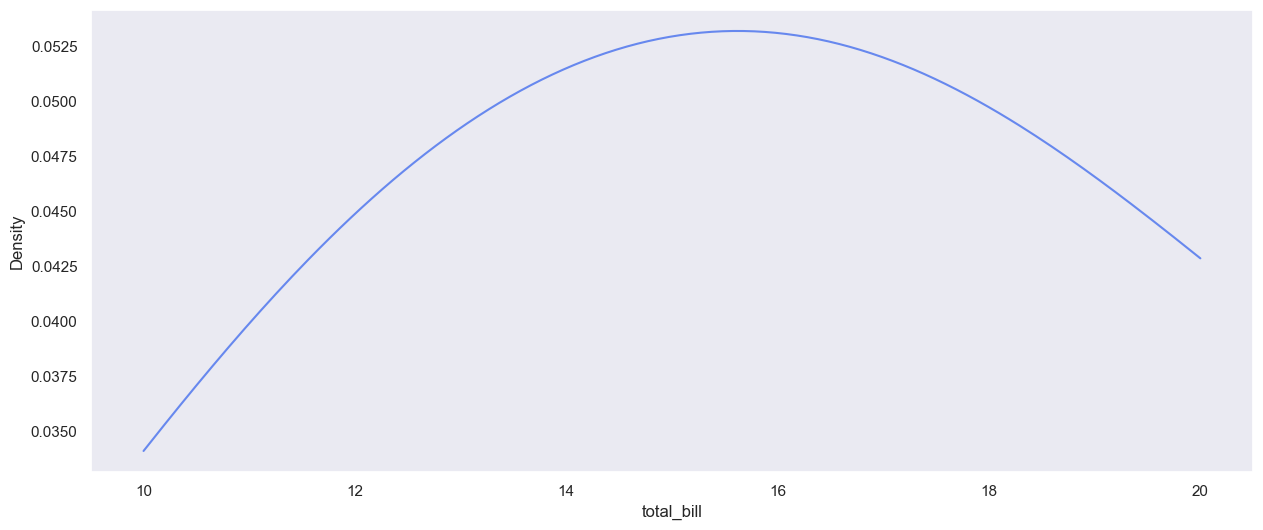

In [119]:
sns.kdeplot(x="total_bill", data = tips, clip=[10,20]);

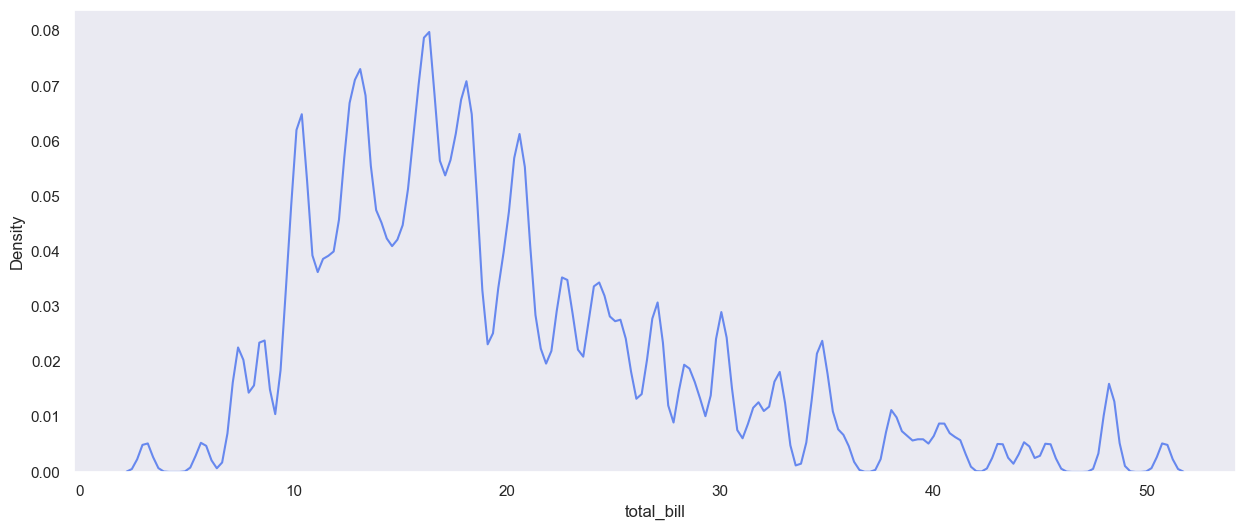

In [123]:
sns.kdeplot(x="total_bill", data=tips, bw_adjust=0.1);

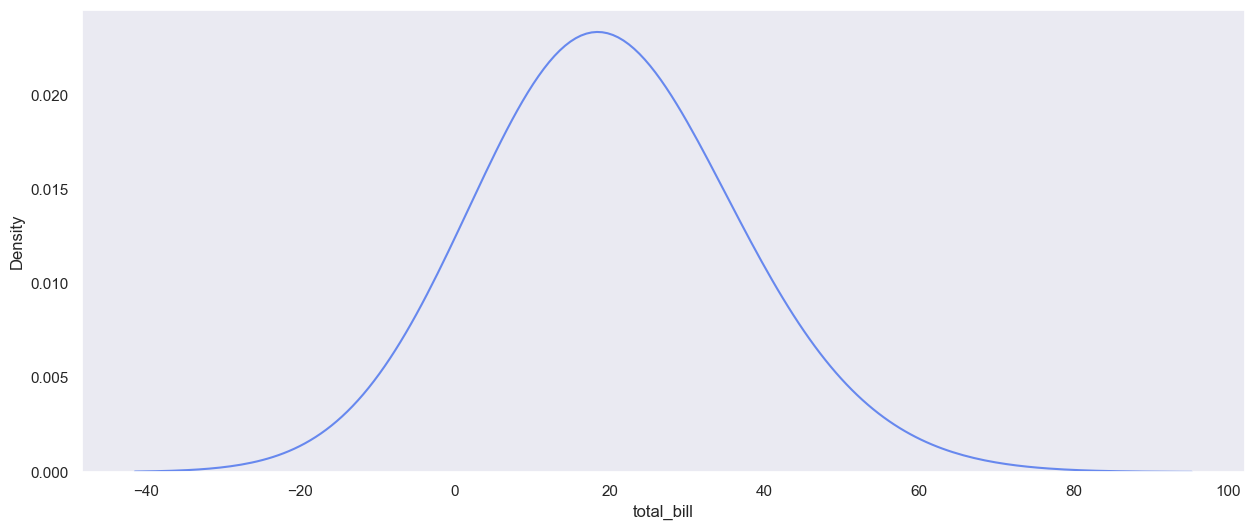

In [129]:
sns.kdeplot(x="total_bill", data=tips, bw_adjust=5);

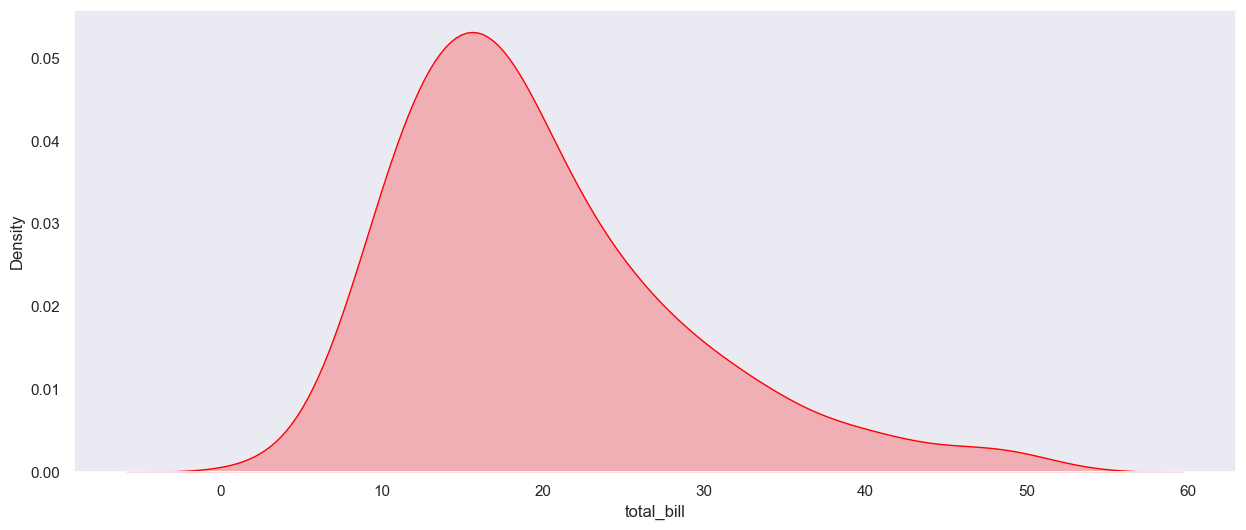

In [131]:
sns.kdeplot(x="total_bill", data=tips, shade=True, color="red");

In [132]:
df = pd.DataFrame(np.random.normal(0,1,size=(100,2)), columns=["X", "Y"])
df

,X,Y
0,0.078372,1.959378
1,0.956269,-1.335075
2,-0.180482,0.229843
3,-0.410537,-0.577205
4,1.082031,-0.242645
...,...,...
95,-1.156420,-0.633531
96,0.548986,-0.122069
97,1.885696,-0.096326
98,-0.237810,-1.549235


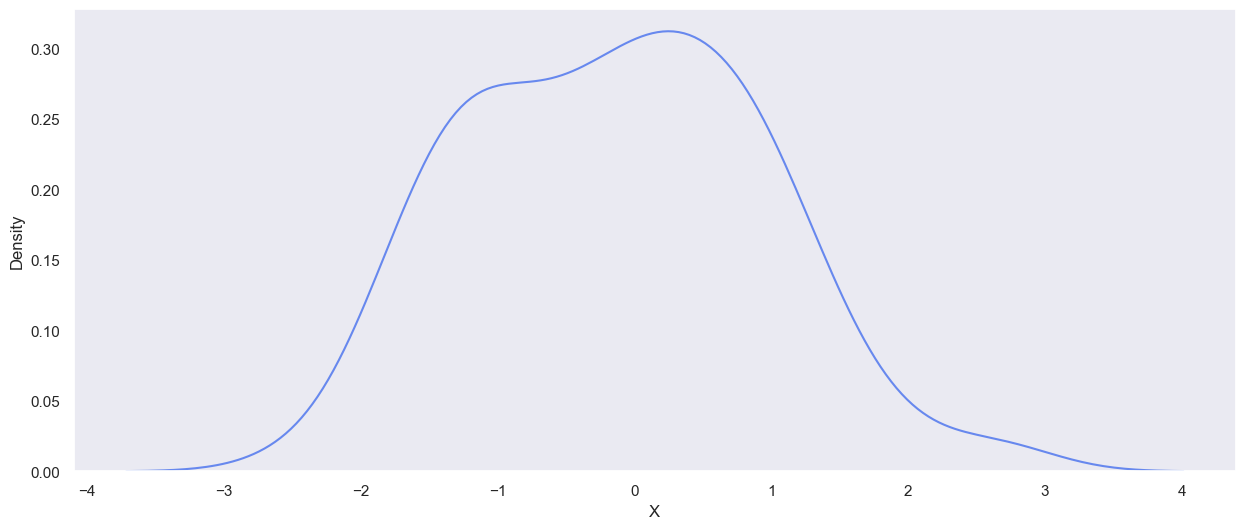

In [133]:
sns.kdeplot(data=df, x="X");

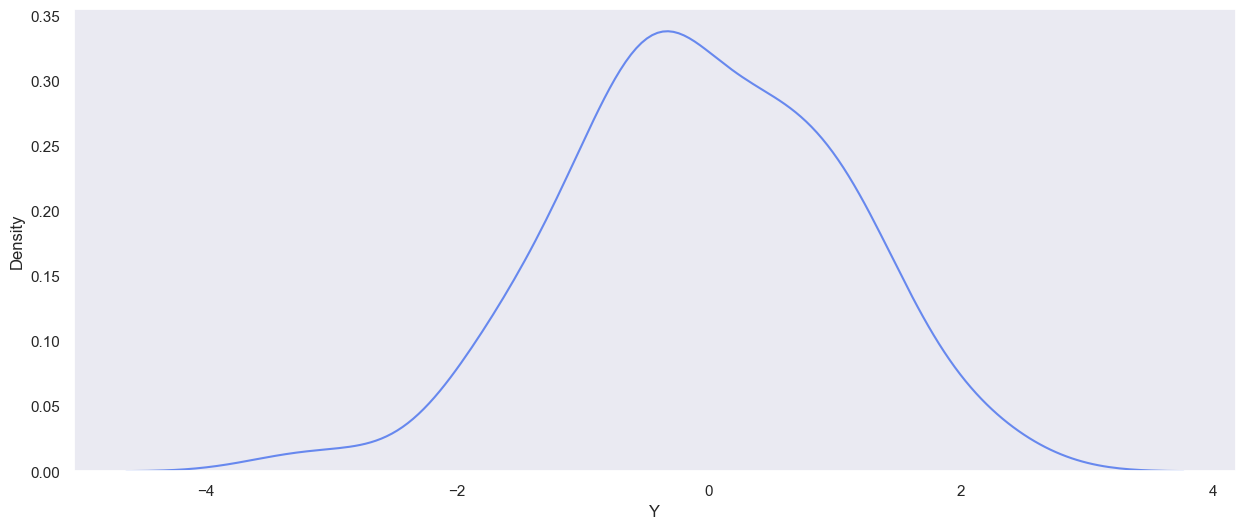

In [134]:
sns.kdeplot(data=df, x="Y");

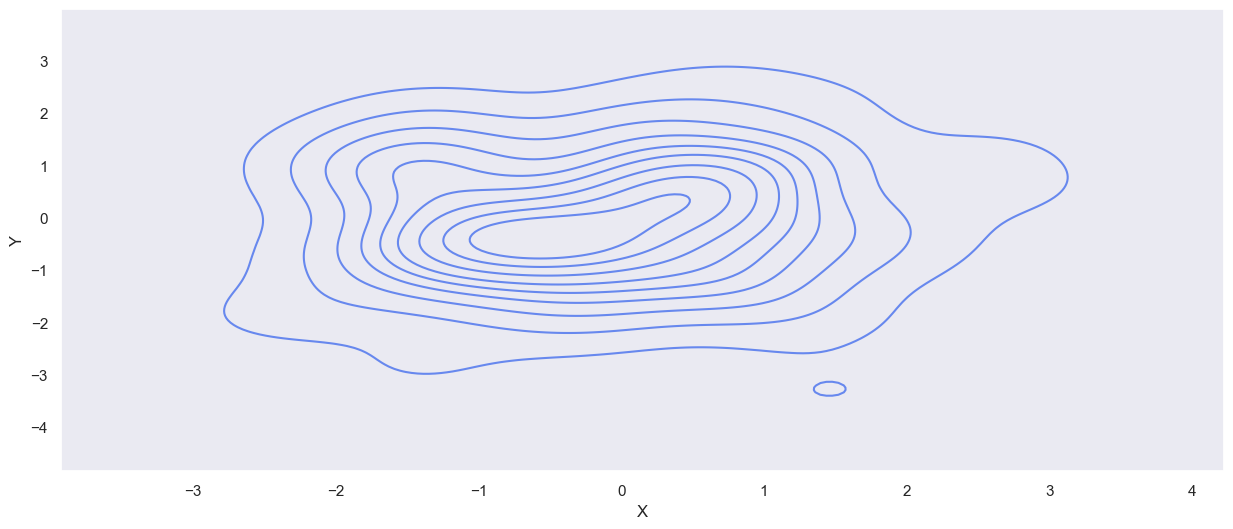

In [135]:
sns.kdeplot(data=df, x="X", y="Y");

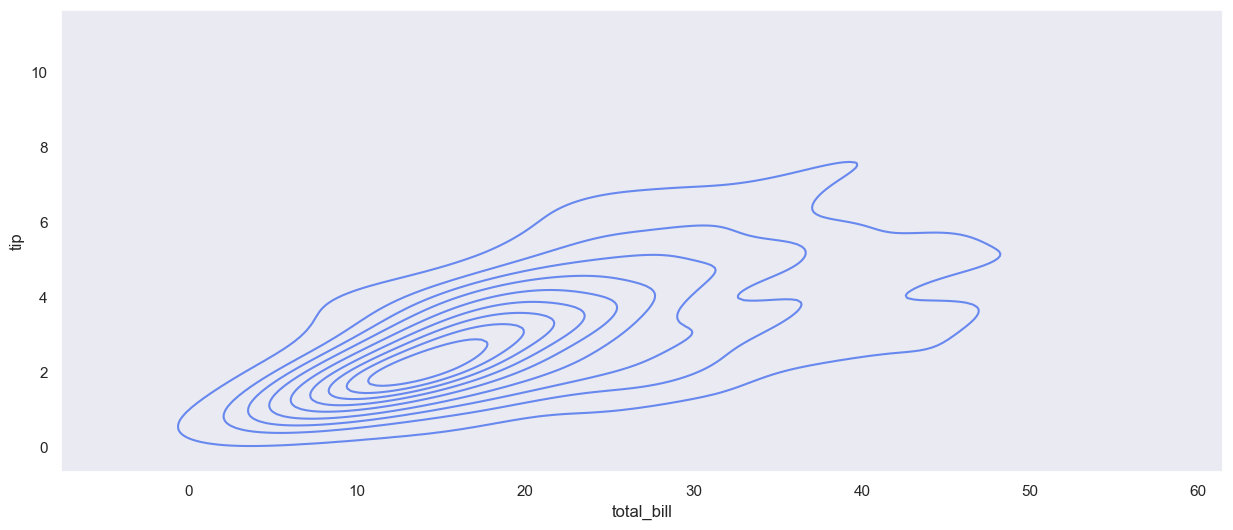

In [136]:
sns.kdeplot(data=tips, x="total_bill", y="tip");

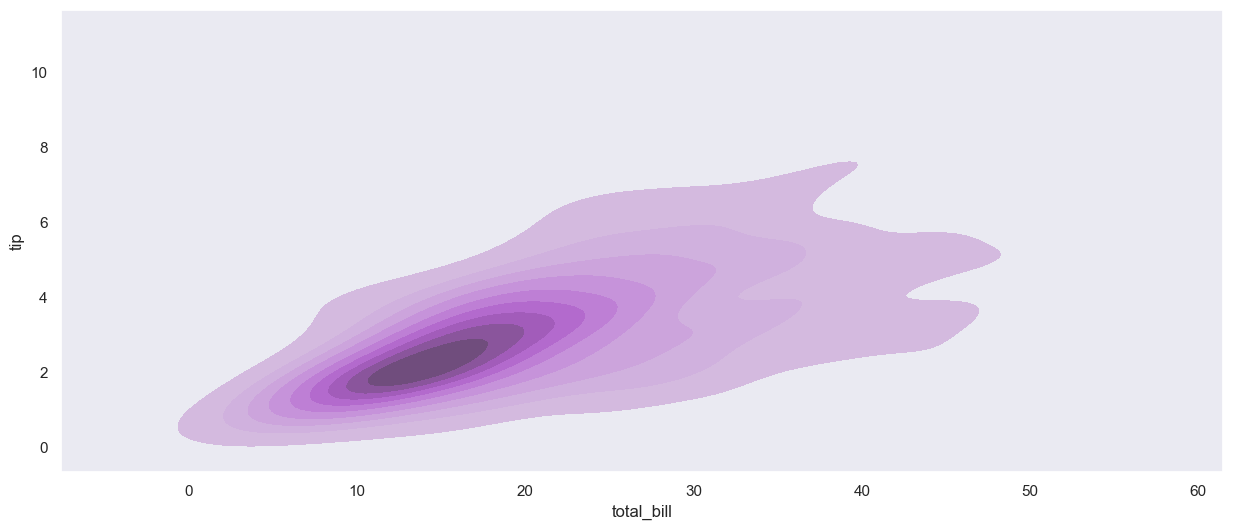

In [139]:
sns.kdeplot(data=tips, x="total_bill", y="tip", shade=True, color="#BF81D6");

In [4]:
np.random.seed(101)

x = np.random.normal(0, 1, size=20)

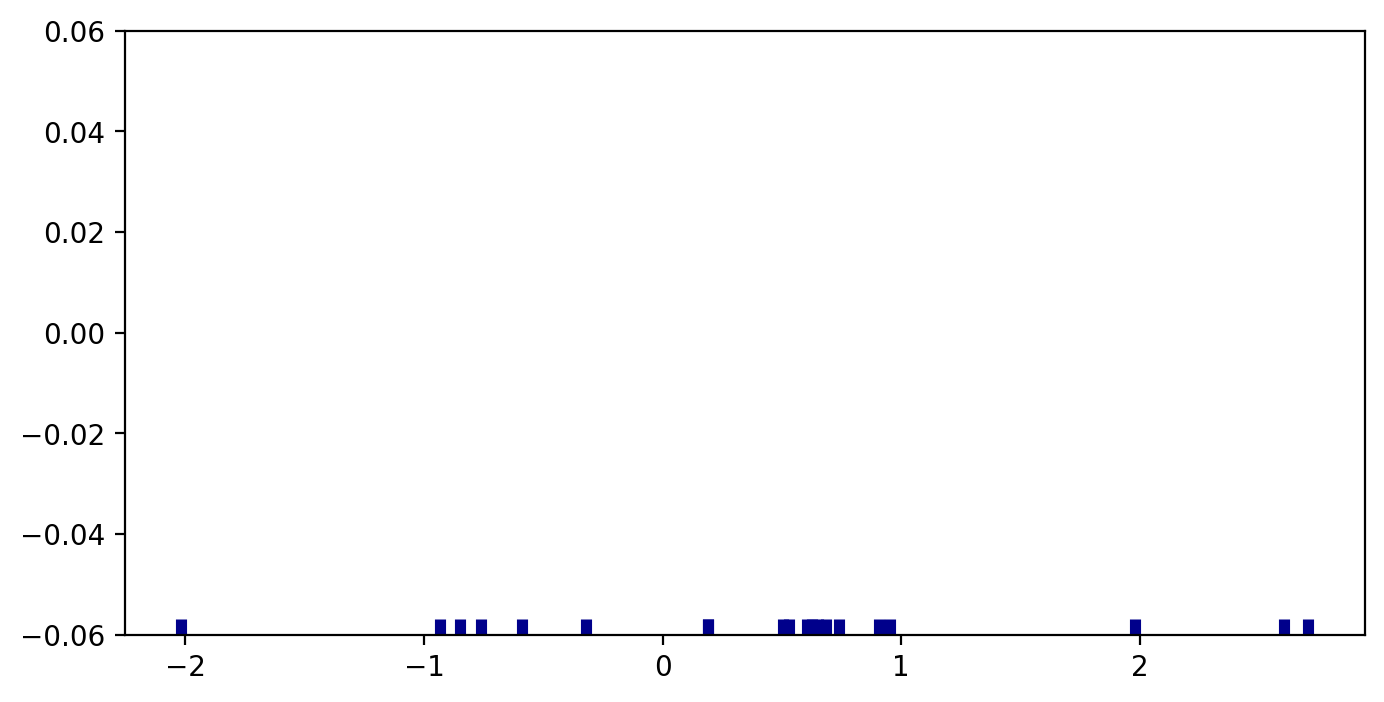

In [5]:
plt.figure(figsize=(8, 4), dpi=200)

sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

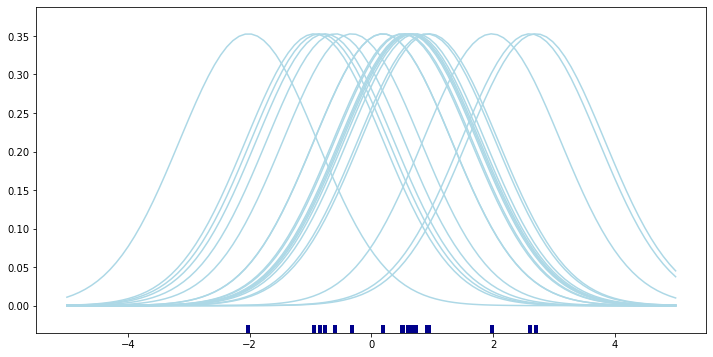

In [6]:
plt.figure(figsize=(8, 4), dpi=200)

bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12 ,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

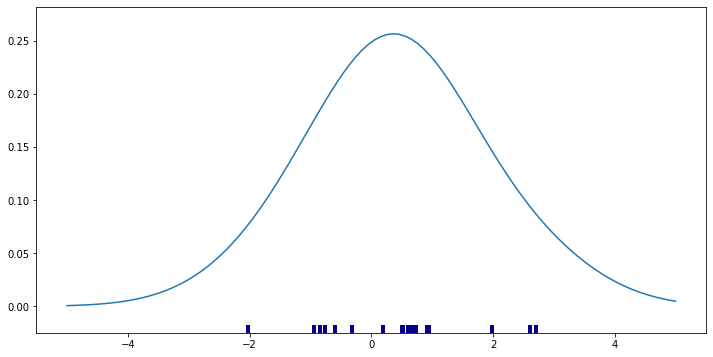

In [7]:
plt.figure(figsize=(8, 4), dpi=200)

from scipy.integrate import trapz

plt.figure(figsize=(12, 6))

density = np.sum(kernels, axis=0)
density /= trapz(density, support)

plt.plot(support, density);
sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

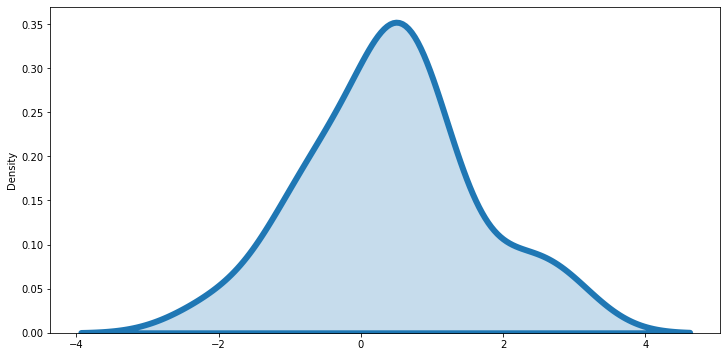

In [8]:
plt.figure(figsize=(8, 4), dpi=200)

bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12, 6))

for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
#     plt.plot(support, kernel, color="lightblue")

# sns.rugplot(x, color="darkblue", linewidth=4)
sns.kdeplot(x,linewidth=6,shade=True);